The purpose of this project is to perform topic modeling on data scraped from glassdoor.com

For more info on how the data was collected, please see [https://github.com/djkjohnston/glassdoor_scrape](https://github.com/djkjohnston/glassdoor_scrape)

In [1]:
import pandas as pd
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
interviews = pd.read_csv('data/glassdoor_interviews.csv')

In [3]:
interviews.head()

,application_proccess,company,interview_description,interview_difficulty,interview_experience,interview_questions,job_title,offer_status,review_date
0,NaN,General Assembly,"It was very friendly but difficult, a lot of q...",Difficult Interview,Negative Experience,"Why do you think we should hire you? ,Answe...",Teaching Assistant,Accepted Offer,"Dec 21, 2017"
1,The process took 3+ months. I interviewed at G...,General Assembly,One of the worst interview processes I have ev...,Easy Interview,Negative Experience,How does your experience relate to the positi...,Commercial Counsel,No Offer,"Dec 11, 2017"
2,NaN,General Assembly,Was contacted for a phone interview. After sch...,NaN,Negative Experience,NaN,Marketing,No Offer,"Nov 30, 2017"
3,I applied online. The process took 2 weeks. I ...,General Assembly,"They call you, you have a brief phone intervie...",Easy Interview,Negative Experience,Typical and very generic interview questions....,"""Admissions Receptionist""",No Offer,"Jan 1, 2018"
4,I applied through a recruiter. The process too...,General Assembly,"3 phone interviews, and a task (three question...",Average Interview,Negative Experience,"What tradeshows should we focus on? ,1 Answ...",B2B Marketing Manager,No Offer,"Oct 31, 2017"


In [4]:
interviews['interview_description'][0]

"It was very friendly but difficult, a lot of questions doesn't belong to industry, but i had a lot of fun, great interviewers. Amazing environment. When i get in they offer me water, tea, coffee and I think it was very nice of them."

In [5]:
interviews['interview_questions'][0]

' Why do you think we should hire you? \xa0 ,Answer Question'

In [6]:
interviews['interview_questions'][4]

' What tradeshows should we focus on? \xa0 ,1 Answer, How can we use our blog to create a whitepaper? \xa0 ,1 Answer, What can we do to reach our audience (c-level, etc.) \xa0 ,1 Answer'

In [7]:
interviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 9 columns):
application_proccess     80 non-null object
company                  87 non-null object
interview_description    87 non-null object
interview_difficulty     78 non-null object
interview_experience     86 non-null object
interview_questions      76 non-null object
job_title                87 non-null object
offer_status             87 non-null object
review_date              87 non-null object
dtypes: object(9)
memory usage: 6.2+ KB


In [8]:
interviews.describe().T

,count,unique,top,freq
application_proccess,80,73,I applied online. I interviewed at General Ass...,7
company,87,1,General Assembly,87
interview_description,87,87,Connected with the recruiter who was commandin...,1
interview_difficulty,78,3,Average Interview,41
interview_experience,86,4,Negative Experience,38
interview_questions,76,76,"Best Practices, Experience, Past Projects ,...",1
job_title,87,68,Teaching Assistant,5
offer_status,87,3,No Offer,64
review_date,87,83,"Jun 1, 2016",2


## Data cleaning and prep

Tasks:


* `application process`
    * clean punctiation and symbols
    * convert to all lower case
    * lamentize words
    * consider how to deal with '2 weeks' vs 'two weeks'
* `interview_description`
    * clean punctiation and symbols
    * convert to all lower case
    * lamentize words
* `interview_difficulty`
    * leave as is for now. Maybe map responses to values
* `interview_experience`
    * leave as is for now. Maybe map responses to values
* `interview_questions`
    * clean punctiation and symbols
    * convert to all lower case
    * lamentize words
    * Clean out 'Answer Question' and '1 Answer' kinds of text
* `job_title`
    * clean punctiation and symbols
* `offer_status`
    * leave as is for now. Maybe map responses to values
* `review_date`
    * convert to datetime field
   

In [9]:
interviews['review_date'] = pd.to_datetime(interviews['review_date'])
interviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 9 columns):
application_proccess     80 non-null object
company                  87 non-null object
interview_description    87 non-null object
interview_difficulty     78 non-null object
interview_experience     86 non-null object
interview_questions      76 non-null object
job_title                87 non-null object
offer_status             87 non-null object
review_date              87 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 6.2+ KB


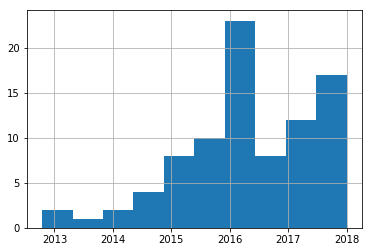

In [10]:
interviews['review_date'].hist()

Time to clean `job_title`, `application_process`, `interview_description`, and `interview_questions`

In [11]:
def cleaner(text):
    #simple text cleaning
    table = str.maketrans({punc:None for punc in string.punctuation})

        
    mapping = [('&#39;', ''), 
               ('<br />', ''), 
               ('<.*>.*</.*>', ''), 
               ('\\ufeff', ''), 
               ('[\d]', ''),  
               ('\[.*\]', ''),  
#                ('[^a-z ]', ''),
               ('question', ''),
               ('answer', ''), 
              ]
    if type(text) == str:
        for k, v in mapping:
            text = re.sub(k, v, text)
            text = text.translate(table)    
    
        # lemmatization 
        text = " ".join(lemma.lemmatize(word) for word in text.split())

        #remove stop words
        text = " ".join([word for word in text.lower().split() if word not in eng_stop])

    return text

In [12]:
eng_stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

interviews['interview_questions'] = interviews['interview_questions'].str.lower().apply(cleaner)
interviews['application_proccess'] = interviews['application_proccess'].str.lower().apply(cleaner)
interviews['interview_description'] = interviews['interview_description'].str.lower().apply(cleaner)
interviews['job_title'] = interviews['job_title'].str.lower().apply(cleaner)

In [13]:
interviews.head()

,application_proccess,company,interview_description,interview_difficulty,interview_experience,interview_questions,job_title,offer_status,review_date
0,NaN,General Assembly,wa friendly difficult lot doesnt belong indust...,Difficult Interview,Negative Experience,think hire,teaching assistant,Accepted Offer,2017-12-21
1,process took month interviewed general assembly,General Assembly,one worst interview process ever participated ...,Easy Interview,Negative Experience,doe experience relate position,commercial counsel,No Offer,2017-12-11
2,NaN,General Assembly,wa contacted phone interview scheduling blocki...,NaN,Negative Experience,NaN,marketing,No Offer,2017-11-30
3,applied online process took week interviewed g...,General Assembly,call brief phone interview call ask generic in...,Easy Interview,Negative Experience,typical generic interview swhere see year grea...,admission receptionist,No Offer,2018-01-01
4,applied recruiter process took month interview...,General Assembly,phone interview task three research write subm...,Average Interview,Negative Experience,tradeshows focus use blog create whitepaper re...,bb marketing manager,No Offer,2017-10-31


The data is (roughly) cleaned up. Time to set up the topic modeling pipeline. I am starting with Non-negative Matrix Factorization (NMF), since it appears that the topics may be more reliable for relatively small numbers of documents. 

Consider revisiting to impliment Latent Dirichlet Allocation (LDA).

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF



# functionalized since there are a few different fields to model

def get_topics(documents, n_features=1000, n_topics=10):
    
    documents = documents[documents.notnull()]
    
    #starting with tfidf
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(documents)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    
    #nmf
    nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
    nmf.fit(tfidf)
    
    for topic_idx, topic in enumerate(nmf.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([tfidf_feature_names[i]
                        for i in topic.argsort()[:-10 - 1:-1]]))
#figure out how to include weights

In [15]:
get_topics(interviews['interview_questions'])

Topic 0:
experience previous past design use learning project able interview wish
Topic 1:
assembly general want work know ask resume explain background like
Topic 2:
wa time sample issue difficult interview situation negative challenge faced
Topic 3:
tell role feel skill wrong handle previous time help relevant
Topic 4:
job asked explain good process search design program regarding area
Topic 5:
think program time make adult working day typical like skill
Topic 6:
student help need new classroom search area like field background
Topic 7:
position doe typical day relevant feel like experience determine difficult
Topic 8:
goal business program provide area issue given doe experience explain
Topic 9:
leadership classroom new wrong difficult doe experience explain faced feel


In [16]:
get_topics(interviews['interview_description'])

Topic 0:
wa interview phone process week day email applied like asked
Topic 1:
time recruiter heard email received feedback application available phone tried
Topic 2:
manager hiring meet based team process recruiter thorough motivation previous
Topic 3:
minute sample teaching schedule contact screening interview phone recruiter director
Topic 4:
student assistant understand responsibility interaction asked good getting involved like
Topic 5:
wa instructor offer given involved job teach time sample recruiter
Topic 6:
company hr leadership good people young left poor need review
Topic 7:
task emailed heard followed research confirm submitting process round challenging
Topic 8:
person second vague interviewed werent intelligent expectation phone came interviewer
Topic 9:
regarding experience course basically user design marketing stressful specific asked


In [17]:
get_topics(interviews['application_proccess'])

Topic 0:
online applied december atlanta ga took process february july january
Topic 1:
york new ny september online applied february week june process
Topic 2:
week took process inperson january applied april november source online
Topic 3:
san francisco ca march february month april process took inperson
Topic 4:
day took process august recruiter applied june dallas month tx
Topic 5:
washington dc december february november june online april july january
Topic 6:
wa seattle december june inperson september employee july january ga
Topic 7:
employee referral september applied april february day england july january
Topic 8:
monica santa ca june recruiter july applied source december inperson
Topic 9:
april london uk england month took process online atlanta ga
